In [1]:
%matplotlib inline

from plan_runner.environment import ManipStationEnvironment
import numpy as np
import torch
import time
import argparse
import os

import utils
from sac import SAC

In [2]:
# Runs policy for X episodes and returns average reward
def evaluate_policy(agent, eval_episodes=10, max_action=max_action):
    avg_reward = 0.
    for i in xrange(eval_episodes):
        print("Test {}".format(i))
        obs = env.reset()
        done = False
        while not done:
            action = agent.select_action(np.array(obs), eval=True)
            action = max_action*np.tanh(action)
            obs, reward, done, _ = env.step(action)
            avg_reward += reward

    avg_reward /= eval_episodes

    print("---------------------------------------")
    print("Evaluation over %d episodes: %f" % (eval_episodes, avg_reward))
    print("---------------------------------------")
    return avg_reward

**Use this to visualize policies**

In [3]:
# seed = 0
num_evals = 10
visualize = True

In [4]:
parser = argparse.ArgumentParser(description='PyTorch REINFORCE example')
parser.add_argument('--env-name', default="HalfCheetah-v2",
                    help='name of the environment to run')
parser.add_argument('--policy', default="Gaussian",
                    help='algorithm to use: Gaussian | Deterministic')
parser.add_argument('--eval', type=bool, default=False,
                    help='Evaluate a policy (default:False)')
parser.add_argument('--gamma', type=float, default=0.99, metavar='G',
                    help='discount factor for reward (default: 0.99)')
parser.add_argument('--tau', type=float, default=0.005, metavar='G',
                    help='target smoothing coefficient(tau) (default: 0.005)')
parser.add_argument('--lr', type=float, default=0.0003, metavar='G',
                    help='learning rate (default: 0.0003)')
parser.add_argument('--alpha', type=float, default=0.2, metavar='G',
                    help='Temperature parameter alpha determines the relative importance of the entropy term against the reward (default: 0.2)')
parser.add_argument('--seed', type=int, default=543, metavar='N',
                    help='random seed (default: 543)')
parser.add_argument('--batch_size', type=int, default=256, metavar='N',
                    help='batch size (default: 256)')
parser.add_argument('--num_steps', type=int, default=1000000, metavar='N',
                    help='maximum number of steps (default: 1000000)')
parser.add_argument('--hidden_size', type=int, default=256, metavar='N',
                    help='hidden size (default: 256)')
parser.add_argument('--updates_per_step', type=int, default=1, metavar='N',
                    help='model updates per simulator step (default: 1)')
parser.add_argument('--target_update_interval', type=int, default=1, metavar='N',
                    help='Value target update per no. of updates per step (default: 1)')
parser.add_argument('--replay_size', type=int, default=1000000, metavar='N',
                    help='size of replay buffer (default: 10000000)')
parser.add_argument('--save_freq', type=int, default=15000,
                    help='how often to save model and rewards')
parser.add_argument('--load', action='store_true',
                    help='load from previous model')
# args = parser.parse_args()
args = parser.parse_args("--seed 5 --alpha 0.05".split()) 

In [5]:
policy_name = "SAC"
env_name = "ManipStation"

file_name = "%s_%s_%s" % (policy_name, env_name, str(args.seed))
print("---------------------------------------")
print("Settings: %s" % (file_name))
print("---------------------------------------")

if not os.path.exists("./results"):
    exit()

env = ManipStationEnvironment(is_visualizing=visualize)

# Set seeds
env.seed(args.seed)
torch.manual_seed(args.seed)
np.random.seed(args.seed)

state_dim = env.state_dim
action_space = env.action_space
max_action = float(env.action_space.high[0])

agent = SAC(state_dim, action_space, max_action, args)
actor_path = 'models/sac_actor_{}'.format(args.seed)
critic_path = 'models/sac_critic_{}'.format(args.seed)
value_path = 'models/sac_value_{}'.format(args.seed)
agent.load_model(actor_path=actor_path,
    critic_path=critic_path,
    value_path=value_path)

print("Starting in 3 seconds...")
time.sleep(1)
print("2...")
time.sleep(1)
print("1...")
time.sleep(1)
print("Starting!")

evaluate_policy(agent, eval_episodes=num_evals, max_action=max_action)

---------------------------------------
Settings: SAC_ManipStation_5
---------------------------------------
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/
Setting up visualizer...
Loading models from models/sac_actor_5, models/sac_critic_5 and models/sac_value_5
Starting in 3 seconds...
2...
1...
Starting!
Test 0
Test 1
Resetting
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/
Setting up visualizer...
Test 2
Resetting
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/
Setting up visualizer...
Test 3
Resetting
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/
Setting up visualizer...


KeyboardInterrupt: 

**Use this for charts**

In [1]:
def moving_average(data_set, periods=10):
    weights = np.ones(periods) / periods
    return np.convolve(data_set, weights, mode='valid')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plot
import numpy as np

sns.set_style("ticks")
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {'legend.fontsize': 12}
plot.rcParams.update(params)

BASE_DIR = '/home/samir/Documents/6881/final_project/models/'
FIGURE_NAME = 'figures/test.png'

CONV_SIZE = 100
NUM_SEEDS = 10

SHOW = True
SAVE = True

In [8]:
datas = []
datas_x = []

for i in range(NUM_SEEDS):
    path = \
        BASE_DIR + \
        "results_{}.npy".format(i+1)

    try:
        data = np.load(path)
        print(data)
        clean_data = data[np.where(data !=0)]
        clean_data = clean_data[np.where(clean_data > -500)]
        
        avg_data = moving_average(clean_data, CONV_SIZE)
        
        data_x = np.arange(len(clean_data)) + 1
        data_x = moving_average(data_x, CONV_SIZE)
        
        datas.append(avg_data)
        datas_x.append(data_x)
    except:
        continue

num = 12750
new_data = []
for i, d in enumerate(datas):
    new_data.append(d[:num])
    datas_x[i] = datas_x[i][:num]
print(datas)
print(datas_x)

[]
[]
[]


IndexError: list index out of range

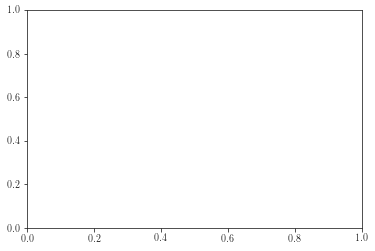

In [4]:
fig, ax = plt.subplots()
sns.set_style("ticks")
data = new_data
x = datas_x[0]
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
error = (mean - std, mean + std)

ax.fill_between(x, error[0], error[1], alpha=0.2)
ax.plot(x, mean, label='')
ax.margins(x=0)

plt.xlabel(r'\textbf{Train Episode}', size=14)
plt.ylabel(r'\textbf{Training Reward}', size=14)
plt.title(r'\textbf{TD3 - Reach Fixed Location}', size=15)

# legend = plt.legend(
#     bbox_to_anchor=(0., 1.07, 1., .102), 
#     loc=3, 
#     ncol=2, 
#     mode="expand", 
#     borderaxespad=0.)

if SAVE:
    
    plt.savefig(BASE_DIR + FIGURE_NAME, bbox_inches="tight", dpi=300) 

if SHOW:
    plt.show()